In [10]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load dataset (Assumed CSV with soil moisture, temp, humidity, water used)
data = pd.read_csv("irrigation_data.csv")
data

,soil_moisture (%),temperature (°C),humidity (%),rainfall (mm),water_needed (liters)
0,61,32,54,17,125
1,24,42,20,3,450
2,70,44,59,1,240
3,30,40,83,13,320
4,33,34,41,12,315
...,...,...,...,...,...
495,28,25,29,14,320
496,48,23,51,12,240
497,76,16,72,8,140
498,54,26,49,8,250


In [11]:
print(data.columns)

Index(['soil_moisture (%)', 'temperature (°C)', 'humidity (%)',
       'rainfall (mm)', 'water_needed (liters)'],
      dtype='object')


In [12]:
X = data[['soil_moisture (%)', 'temperature (°C)', 'humidity (%)']]
y = data['water_needed (liters)']

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict and evaluate
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 51.0355


In [16]:
# Save model for deployment
import joblib

model_filename = "smart_irrigation_model.pkl"
joblib.dump(model, model_filename)

# Display success message
print(f"Model saved successfully as: {model_filename}")

Model saved successfully as: smart_irrigation_model.pkl


In [17]:
# Replace 'path_to_your_file.pkl' with the actual path to your PKL file
file_path = 'smart_irrigation_model.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Now 'data' contains the deserialized Python object
print(data)

['soil_moisture (%)' 'temperature (°C)' 'humidity (%)']


In [19]:
# Reload dataset
df_irrigation = pd.read_csv("irrigation_data.csv")

# Check column names to avoid KeyErrors
print(df_irrigation.columns)

Index(['soil_moisture (%)', 'temperature (°C)', 'humidity (%)',
       'rainfall (mm)', 'water_needed (liters)'],
      dtype='object')


In [21]:
# Set style
sns.set_style("whitegrid")

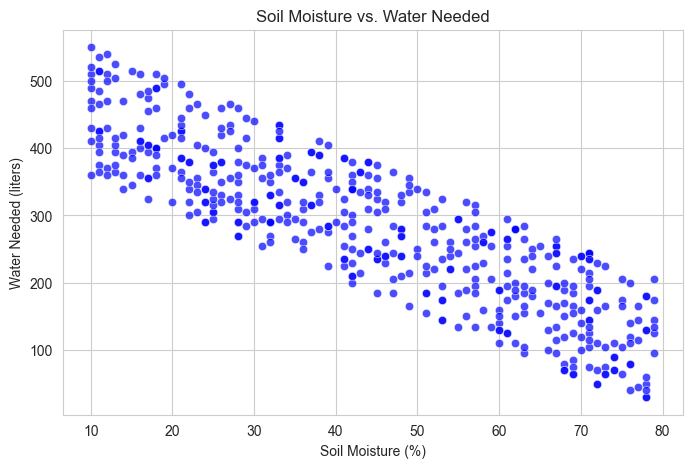

In [22]:
# Scatter plot: Soil Moisture vs. Water Needed
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_irrigation["soil_moisture (%)"], y=df_irrigation["water_needed (liters)"], alpha=0.7, color="blue")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("Water Needed (liters)")
plt.title("Soil Moisture vs. Water Needed")
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_11016\1472621446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_water_needed = df_irrigation.groupby("temperature_range")["water_needed (liters)"].mean()
C:\Users\muham\AppData\Local\Temp\ipykernel_11016\1472621446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water_needed.index, y=avg_water_needed.values, palette="coolwarm")


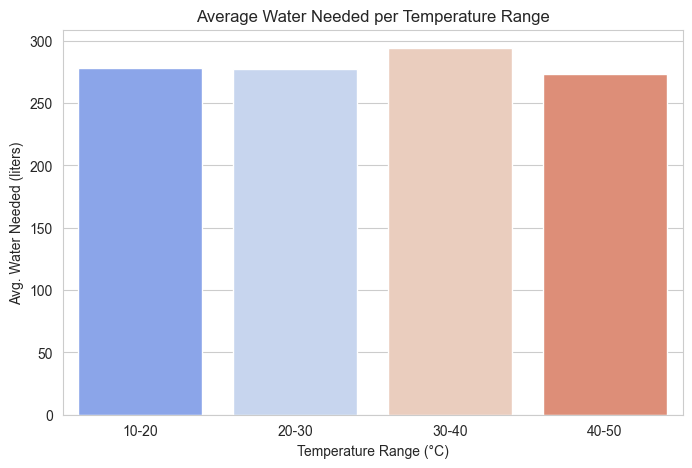

In [23]:
# Bar Plot: Average Water Needed per Temperature Range
df_irrigation["temperature_range"] = pd.cut(df_irrigation["temperature (°C)"], bins=[10, 20, 30, 40, 50], labels=["10-20", "20-30", "30-40", "40-50"])
avg_water_needed = df_irrigation.groupby("temperature_range")["water_needed (liters)"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_water_needed.index, y=avg_water_needed.values, palette="coolwarm")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Avg. Water Needed (liters)")
plt.title("Average Water Needed per Temperature Range")
plt.show()

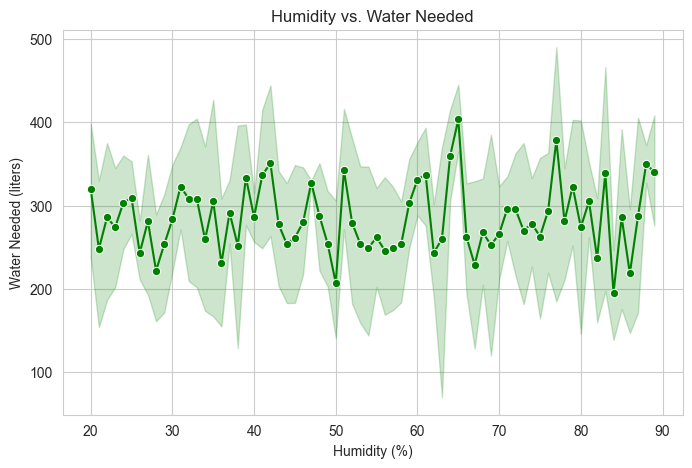

In [24]:
# Line Plot: Humidity vs. Water Needed
plt.figure(figsize=(8, 5))
sns.lineplot(x=df_irrigation["humidity (%)"], y=df_irrigation["water_needed (liters)"], color="green", marker="o")
plt.xlabel("Humidity (%)")
plt.ylabel("Water Needed (liters)")
plt.title("Humidity vs. Water Needed")
plt.show()